# PIVPy Example:

This notebook shows an example of how one can use vecpy in order to load manipulate and display analyzed PIV data. 

### step 1 - import pivpy and dependencies

here we import the package code so that we can use it next 

In [1]:
import os, sys 
# sys.path.append(os.path.abspath('../'))

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

from pivpy import io, pivpy, graphics

# for the sake of this tutorial, ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

### step 2 - load the tests data

In order to load the data, first we need to set up the path to the data directory. Following that we need to get a list of files names that we would like to view/analyze. Finally we very quickly load the data in to a list of vec instances.

In [2]:
# pointer to the directory with the data
path_to_data = os.path.abspath('../../tests/data/')
# list the directory
os.listdir(path_to_data)

['day2a005001.T000.D000.P003.H001.L.vec',
 'exp1_001_b.txt',
 'Run000001.T000.D000.P000.H001.L.vec',
 'Run000004.T000.D000.P000.H001.L.vec',
 'day2a005003.T000.D000.P003.H001.L.vec',
 'exp1_001_b_noflt.txt',
 'day2a005004.T000.D000.P003.H001.L.vec',
 'Run000003.T000.D000.P000.H001.L.vec',
 'Run000002.T000.D000.P000.H001.L.vec',
 'exp1_001_b_flt.txt',
 'day2a005005.T000.D000.P003.H001.L.vec',
 'day2a005002.T000.D000.P003.H001.L.vec',
 'Run000005.T000.D000.P000.H001.L.vec',
 'exp1_001_b.vec',
 'day2a005000.T000.D000.P003.H001.L.vec']

In [3]:
# let's read only the files from the Run* 
data = io.load_directory(path_to_data,basename='Run*')

In [4]:
# let's check if it's read:
data.attrs['files']

['/Users/alex/Documents/OpenPIV/pivpy/tests/data/Run000001.T000.D000.P000.H001.L.vec',
 '/Users/alex/Documents/OpenPIV/pivpy/tests/data/Run000002.T000.D000.P000.H001.L.vec',
 '/Users/alex/Documents/OpenPIV/pivpy/tests/data/Run000003.T000.D000.P000.H001.L.vec',
 '/Users/alex/Documents/OpenPIV/pivpy/tests/data/Run000004.T000.D000.P000.H001.L.vec',
 '/Users/alex/Documents/OpenPIV/pivpy/tests/data/Run000005.T000.D000.P000.H001.L.vec']

### step 3 - plot some arrows

first things first - show a quiver plot

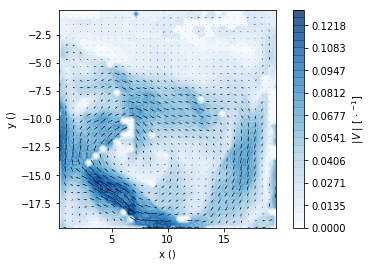

In [5]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=20)

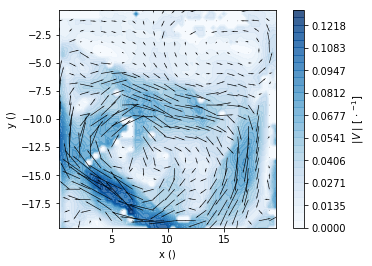

In [6]:
fig, ax = graphics.quiver(data, nthArr=3, arrScale=5)

In [7]:
# we can read also a single file only into a 1 frame dataset
d = io.loadvec('/Users/alex/Documents/OpenPIV/pivpy/tests/data/Run000001.T000.D000.P000.H001.L.vec')

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a223140f0>)

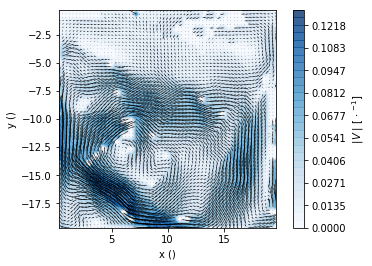

In [8]:
graphics.quiver(d,arrScale=10)

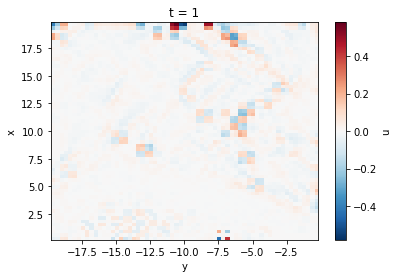

In [9]:
d.isel(t=0).differentiate(coord='x').differentiate(coord='y')['u'].plot.pcolormesh()

and a vorticity map

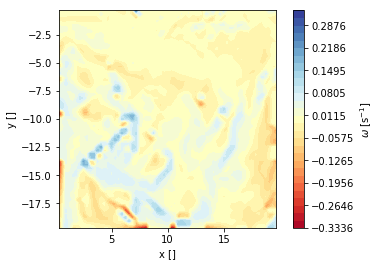

In [10]:
# prepare vorticity
d.piv.vec2scal(property='curl') # it will appear as d['w'] variable, 'w' for all scalar properties

# plot
fig, ax = graphics.contour_plot(d)

Also, velocity histograms in x and y directions

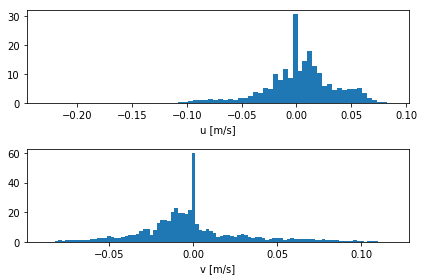

In [12]:
fig, ax = graphics.histogram(data, normed = True)

We can also plot a whole list of vec's as subplots:

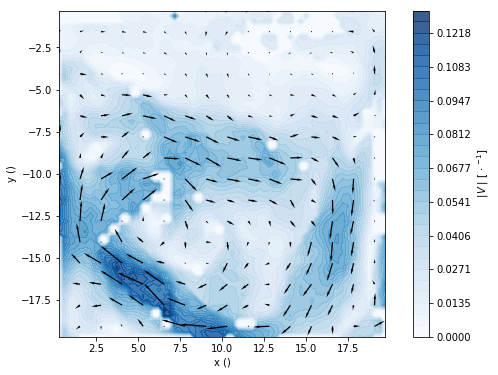

In [13]:
fig, ax = graphics.quiver(data, nthArr=4, arrScale=10)
fig.set_size_inches(10, 6)

# Last but not least - manipulation

lets create a linear combinatino of our data and then see how to manipulate the coordinate system

__Addition and Scalar multiplication__

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a229e37b8>)

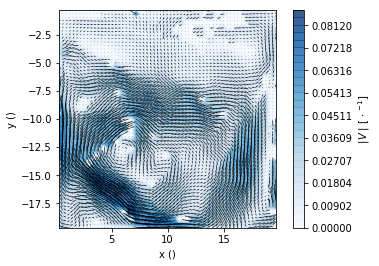

In [18]:
v = (data + 3*data - 2 * data.isel(t=0)) / 3.
graphics.quiver(v, arrScale=10)

__Crop__

In [ ]:
v.crop(3,9,-16,-10)  #(xmin, xmax, ymin, ymax)
vecPlot.genQuiver(v, arrScale=10)

__Rotate__

In [ ]:
v.rotate(90) # 90 degrees rotation clockwise
fig, ax = vecPlot.genQuiver(v, arrScale=10)

__Translation of Coordinate System__

In [ ]:
v.move(-10,-3)
fig, ax = vecPlot.genQuiver(v, arrScale=10)